In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from scipy import stats
from pathlib import Path, PureWindowsPath

In [2]:
def extract_dataset_info(data_path):
    # extract information from train.txt
    f = open(os.path.join(data_path, "train.txt"), "r")
    contents_train = f.readlines()
    label_classes, label_train_list, img_train_list = [], [], []
    for sample in contents_train:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        if label not in label_classes:
            label_classes.append(label)
        label_train_list.append(sample[0])
        img_train_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))
    print('Classes: {}'.format(label_classes))

    # extract information from test.txt
    f = open(os.path.join(data_path, "test.txt"), "r")
    contents_test = f.readlines()
    label_test_list, img_test_list = [], []
    for sample in contents_test:
        sample = sample.split()
        label, img_path = sample[0], sample[1]
        label_test_list.append(label)
        img_test_list.append(os.path.join(data_path, Path(PureWindowsPath(img_path))))  # you can directly use img_path if you run in Windows

    return label_classes, label_train_list, img_train_list, label_test_list, img_test_list

In [3]:
def get_tiny_image(img, output_size):
    # To do
    img_norm = img- np.mean(img)   # normalize
    feature = cv2.resize(img_norm, output_size, interpolation = cv2.INTER_AREA)    
    return feature

In [4]:
label_classes, label_train_list, img_train_list, label_test_list, img_test_list = extract_dataset_info("./scene_classification_data")

Classes: ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb', 'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast', 'Mountain', 'Forest']


In [5]:
label_train_list[0]

'Kitchen'

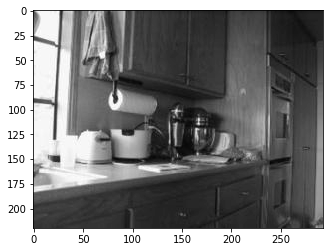

In [6]:
img = cv2.imread(img_train_list[0],0)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [13]:
k = 5
output_size= (16,16)
feature_vec = []
for name in img_train_list :
    img = cv2.imread(name,0)
    feature = get_tiny_image(img, output_size)
    feature_vec.append( feature.reshape(np.prod(feature.shape)))

In [18]:
feature_test_vec = []
for name in img_test_list :
    img = cv2.imread(name,0)
    feature_test = get_tiny_image(img, output_size)
    feature_test_vec.append( feature.reshape(np.prod(feature_test.shape)))

In [35]:
a = np.array(feature_vec)
#a.shape
b = []
for item in label_test_list:
    b.append(label_classes.index(item))
    
b = np.array(b)
#print(b)
a_test = np.array(feature_test_vec)

print(a)

[[115.81454481 100.55720831  33.90893385 ... -41.19884954 -38.90421753
  -10.94058266]
 [ 46.12598237  47.64518816  -9.39588826 ... -97.42722038 -97.49634888
  -83.45104995]
 [-29.06423965 -32.38003229 -26.94857115 ...   3.70206308 -29.71648893
   15.66234782]
 ...
 [-29.17918396  42.22706604 -25.38230896 ...  56.76222229  45.50440979
   28.50440979]
 [-71.09266663 -74.61219788 -82.56922913 ...   5.89561462  18.89952087
   -0.36219788]
 [ 19.24513245   7.55763245  71.2802887  ...  48.99513245 -71.26268005
   18.8427887 ]]


In [46]:
nbrs = NearestNeighbors(algorithm='auto').fit(a)
    
distances, indices =nbrs.kneighbors(a_test,n_neighbors=k)

In [47]:
indices[50:160,:]

array([[1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347, 1236, 1479],
       [1499, 1447, 1347,